In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 5]
from jupyterthemes import jtplot
jtplot.style()

# Arbol de Cayley

In [46]:
def enlaces_cayley(k,s):
    """Asume que k y s son int con k y s > 0 
       Regresa una list de aristas contruidas con base en el arbol de cayley."""
    if k>2:
        pos = 2
        nodo = 1
        num_nodos_max = ((1-(k-1)**(s-1))/(2-k))*k + 1
        links = []
        for i in range(s):
            if pos == 2:
                for j in range(pos,pos+k):
                    links.append((nodo,j))
                pos = pos+k
                nodo = nodo+1
            else:
                while nodo <= num_nodos_max:
                    for j in range(pos,pos+(k-1)):
                        links.append((nodo,j))
                    nodo = nodo + 1
                    pos = pos + (k-1)
    else:
        if k == 1:
            links = [(1,2)]
        else:
            links = [(i,i+1) for i in range(1,2*s+1)]
    return links

In [47]:
print(enlaces_cayley(2,3))

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


In [48]:
def cayley(k,s):
    """Asume int k y s, ambos > 0 
       Regresa un objeto tipo Graph de la clase graph de la biblioteca networkx
           contruido como una arbol de cayley."""
    g = nx.Graph()
    if k>2:
        num_nodos = ((1-(k-1)**(s))/(2-k))*k + 1
        g.add_nodes_from(range(1,int(num_nodos)+1))
        g.add_edges_from(enlaces_cayley(k,s))
    else:
        g.add_edges_from(enlaces_cayley(k,s))
    return g

In [49]:
c = cayley(4,4)

/home/emmanuel/miniconda3/envs/networksenv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


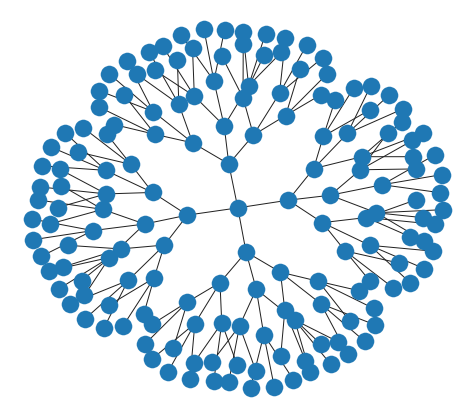

In [50]:
nx.draw_kamada_kawai(c)

## Estos datos corresponden a interaciones entre miembros de una colonia de hormigas , cada nodo representa 1 hormiga y un enlace su interacio'n con otra hormiga, el peso de los enlaces representa cuantas veces se encontraron las mismas hormigas durante el mismo dia. 

In [17]:
data = pd.read_csv("ants/insecta-ant-colony1.edges",sep=" ",names=["nodei","nodej","weight","timestamp"])

In [18]:
edges = [(i,j,k) for i,j,k in zip(data[data.timestamp==41].nodei,
                                  data[data.timestamp==41].nodej,
                                 data[data.timestamp==41].weight)]

In [19]:
data.groupby("timestamp").count().head() # numeor de aristas por cada dia del 1 al 41

,nodei,nodej,weight
timestamp,,,
1,4550,4550,4550
2,4573,4573,4573
3,4483,4483,4483
4,4094,4094,4094
5,4149,4149,4149


In [20]:
g1 = nx.Graph()

In [21]:
g1.add_weighted_edges_from(edges)

/home/emmanuel/miniconda3/envs/networksenv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


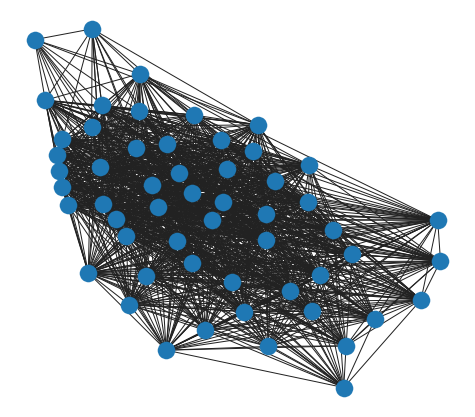

In [22]:
nx.draw_spring(g1)

In [23]:
nx.average_shortest_path_length(g1)
nx.average_clustering(g1)

0.8303838599367608

Text(0.5, 1.0, "Distribucio'n de grado para interaciones entre hormigas durante todo 1 di'a")

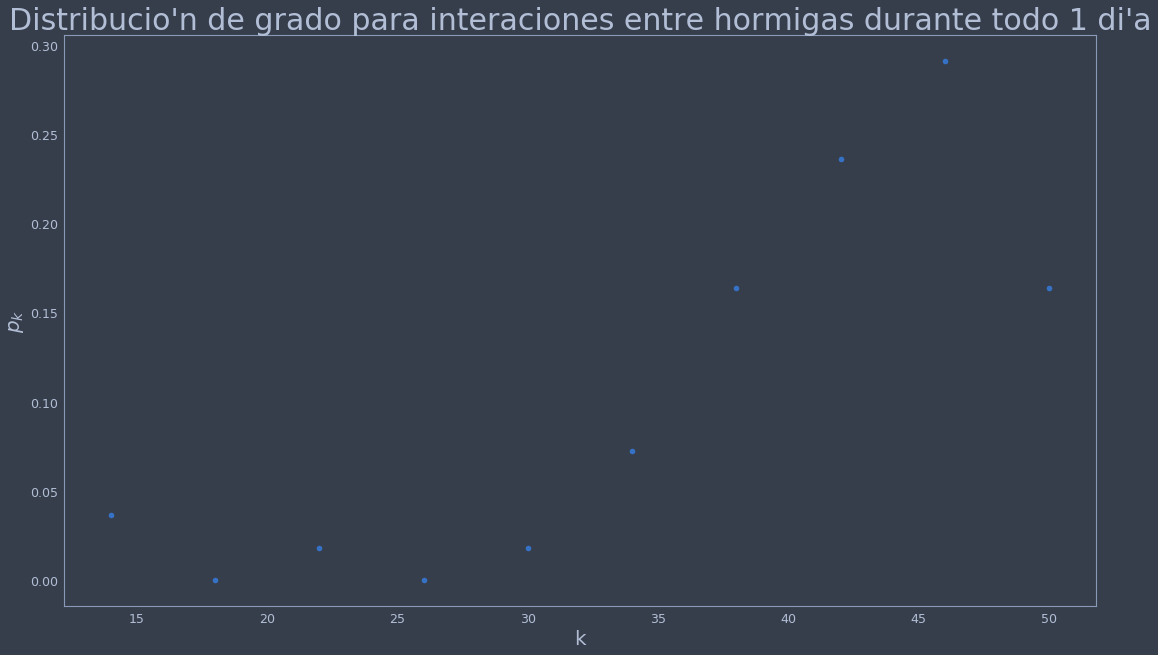

In [24]:
def plot_degree_dist(G,numberbins,logplot=False):
    """Asume G graph, numberbins int > 0, logplot (default = False) boolean.
       Regresa un array de numpy de los grados de los nodos en la red G."""
    degrees = [G.degree(n) for n in G.nodes()]
    degrees = np.array(degrees)
    
    counts,bin_edges = np.histogram(degrees,numberbins)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    d = 0
    for dg in counts:
        d += dg
    plt.plot(bin_centres,counts/d,marker='o',linestyle="")
    if logplot == True:
        plt.xscale('log')
        plt.yscale('log')
    plt.grid()
    plt.xlabel('k',fontsize=20)
    plt.ylabel('$p_k$',fontsize=20)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)      
    return degrees
plot_degree_dist(g1,10)
plt.title("Distribucio'n de grado para interaciones entre hormigas durante todo 1 di'a",fontsize=30)

In [25]:
edgestotales = [(i,j,k) for i,j,k in zip(data.nodei,
                                  data.nodej,
                                 data.weight)]

In [26]:
gt = nx.Graph()
gt.add_weighted_edges_from(edgestotales)

Text(0.5, 1.0, "Distribucio'n de grado acumulado durante 41 di'as")

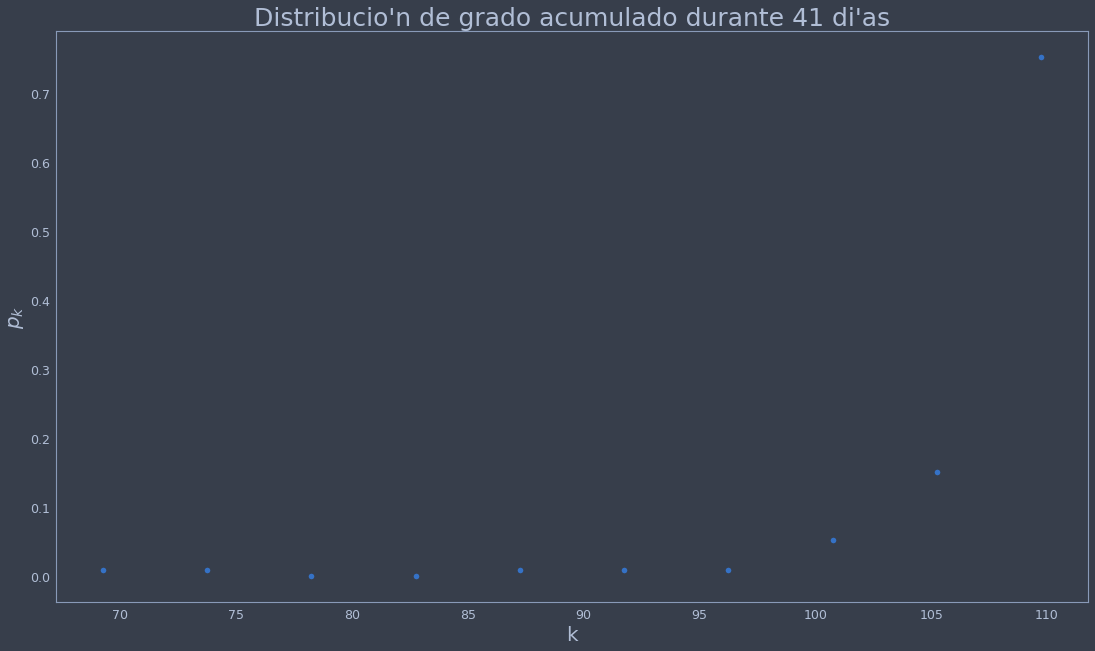

In [27]:
plot_degree_dist(gt,10)
plt.title("Distribucio'n de grado acumulado durante 41 di'as",fontsize=25)

## Estos datos corresponden a fibras nerviosas de la medula de la mosca de la fruta. 

In [28]:
datafly = pd.read_csv("bn_fly_net/bn-fly-drosophila_medulla_1.edges",sep=" ",header=None)

In [29]:
edgesfly = [(i,j) for i,j in zip(datafly[0],
                                  datafly[1])]

In [34]:
g2 = nx.Graph()
g2.add_edges_from(edgesfly)

Text(0.5, 1.0, 'PDF de grado')

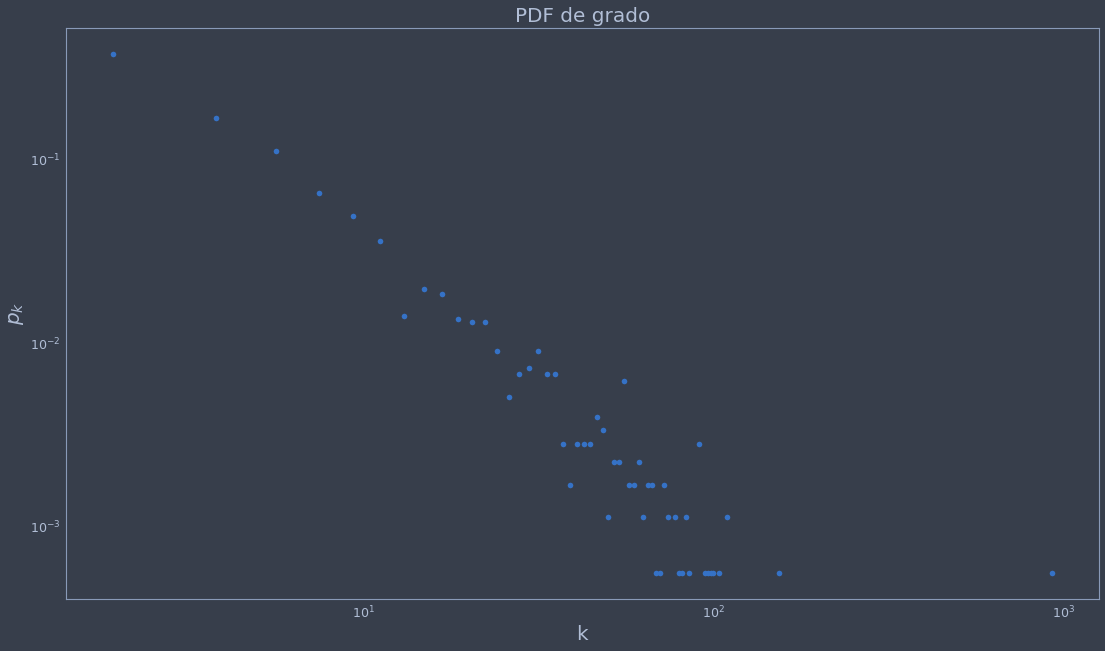

In [56]:
degrees_fly = plot_degree_dist(g2,500,logplot=True)
plt.title("PDF de grado",fontsize=20)

In [57]:
# Estimaci'on del para'metro de escala 
kmin = 1
degrees_fly = degrees_fly[degrees_fly>=kmin]
α = 1 + len(degrees_fly) * (np.sum(np.log(degrees_fly/kmin)))**(-1)

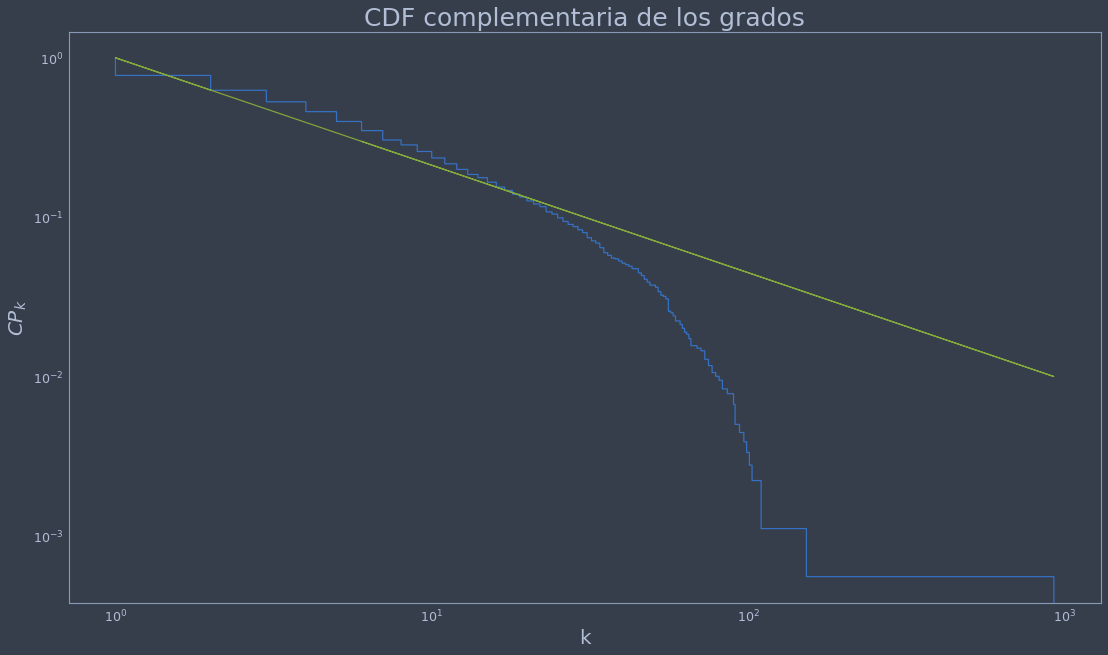

In [58]:
sorted_degrees = np.sort(degrees_fly)
plt.step(np.concatenate([sorted_degrees[::-1], sorted_degrees[[0]]]),
         np.arange(sorted_degrees.size+1)/(1+len(sorted_degrees)))
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('k',fontsize=20)
plt.ylabel('$CP_k$',fontsize=20)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)  
plt.title("CDF complementaria de los grados",fontsize=25)
plt.plot(degrees_fly,(degrees_fly/kmin)**(-α+1)) 

# Conclusiones:

### Los datos del primer conjunto claramente no son consistentes con la hipo'tesis de que se distribuyen conforme a una ley de potencias. 

### Para el segundo conjunto de datos (el de la mosca) el histograma si' parerci'a sugerir que los datos segui'an una ley de potencia, sin embargo al calcular el estimador de maxima verisimilitud del para'metro de escala, y graficar la funcio'n de distribucio'n acumulativa complementaria, se observa que no tampoco se puede explicar su distribucio'n mediante una ley de potencias

In [2]:
import random
from copy import deepcopy

In [3]:
def fractal_model(generation,m,x,e):
	"""
	Returns the fractal model introduced by 
	Song, Havlin, Makse in Nature Physics 2, 275.
	generation = number of generations
	m = number of offspring per node
	x = number of connections between offsprings
	e = probability that hubs stay connected
	1-e = probability that x offsprings connect.
	If e=1 we are in MODE 1 (pure small-world).
	If e=0 we are in MODE 2 (pure fractal).
	"""
	G=nx.Graph()
	G.add_edge(0,1) #This is the seed for the network (generation 0)
	node_index = 2
	for n in range(1,generation+1):
		all_links = list(G.edges())
		while all_links:
			link = all_links.pop()
			new_nodes_a = range(node_index,node_index + m)
			#random.shuffle(new_nodes_a)
			node_index += m
			new_nodes_b = range(node_index,node_index + m)
			#random.shuffle(new_nodes_b)
			node_index += m
			G.add_edges_from([(link[0],node) for node in new_nodes_a])
			G.add_edges_from([(link[1],node) for node in new_nodes_b])
			repulsive_links = list(zip(new_nodes_a,new_nodes_b))
			G.add_edges_from([repulsive_links.pop() for i in range(x-1)])
			if random.random() > e:
				G.remove_edge(*link)
				try:
					G.add_edge(*repulsive_links.pop())
				except IndexError:
					pass
	return G


In [4]:
f = fractal_model(3,3,4,0)

/home/emmanuel/miniconda3/envs/networksenv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


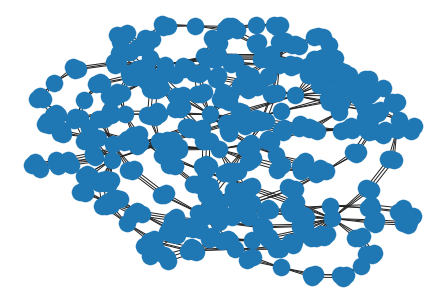

In [7]:
nx.draw_spring(f)

In [5]:
def CBB(G,lb): #This is the compact box burning algorithm.
	"""
	It returns a dictionary with {box_id:subgraph_generated_by_the_nodes_in_this_box}
	The box_id is the center of the box.
	The subgraphs may be disconnected.
	"""	
	uncovered_nodes=G.nodes()
	uncovered_nodes = set(uncovered_nodes)
	covered_nodes = set([])
	boxes_subgraphs = {}
	adj = dict(G.adj)
	while uncovered_nodes:
		center = random.choice(list(uncovered_nodes))
		nodes_visited = {center:0}
		search_queue = [center]
		d = 1
		while len(search_queue) > 0 and d <= lb-1:
			next_depth = []
			extend = next_depth.extend
			for n in search_queue:
				l = [ i for i in adj[n].keys() if i not in nodes_visited ]
				extend(l)
				for j in l: 
					nodes_visited[j] = d
			search_queue = next_depth
			d += 1
		new_covered_nodes = set(nodes_visited.keys())
		new_covered_nodes = new_covered_nodes.difference(covered_nodes)
		nodes_checked_as_centers = set([center])
		while len(nodes_checked_as_centers) < len(new_covered_nodes):
			secondary_center = random.choice(list(new_covered_nodes.difference(nodes_checked_as_centers)))
			nodes_checked_as_centers.add(secondary_center)
			nodes_visited = {secondary_center:0}
			search_queue = [secondary_center]
			d = 1
			while len(search_queue) > 0 and d <= lb-1:
				next_depth = []
				extend = next_depth.extend
				for n in search_queue:
					l = [ i for i in adj[n].keys() if i not in nodes_visited ] # faster than has_key? yep
					extend(l)
					for j in l:
						nodes_visited[j] = d
				search_queue = next_depth
				d += 1
			nodes_covered_by_secondary = set(nodes_visited.keys())
			new_covered_nodes = new_covered_nodes.intersection(nodes_covered_by_secondary)
		boxes_subgraphs[center] = nx.subgraph(G,list(new_covered_nodes))
		uncovered_nodes = uncovered_nodes.difference(new_covered_nodes)
		covered_nodes = covered_nodes.union(new_covered_nodes)
	return boxes_subgraphs


In [35]:
def random_box_covering(G,rb):
	"""
	It returns a dictionary with {box_id:subgraph_generated_by_the_nodes_in_this_box}
	The box_id is the center of the box.
	"""
	H = deepcopy(G)
	burned_nodes = []
	unburned_nodes = G.nodes()
	boxes_subgraphs = {}
	adj = dict(H.adj)
	while unburned_nodes:
		center_node = random.choice(unburned_nodes) 
		nodes_visited = [center_node]
		search_queue = [center_node]
		d = 1
		while search_queue and d <= rb:
			next_depth = []
			extend = next_depth.extend
			for n in search_queue:
				l = [ i for i in adj[n].keys() if i not in nodes_visited]
				extend(l)
				nodes_visited.extend(l)
			search_queue = next_depth
			d += 1
		new_burned_nodes = nodes_visited#.keys()
		H.delete_nodes_from(new_burned_nodes)
		boxes_subgraphs[center_node] = subgraph(G,new_burned_nodes)
		unburned_nodes = list(set(unburned_nodes)-set(new_burned_nodes))
	return boxes_subgraphs

In [17]:
if __name__ == '__main__':
	f=fractal_model(3,2,2,0)
	boxes_subgraphs = CBB(f,2)
	print (len(boxes_subgraphs))

99
